In [5]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2023-10-05 20:18:12--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.67.224.97, 18.67.224.168, 18.67.224.83, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.67.224.97|:80... failed: Unknown error.
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.67.224.168|:80... failed: Unknown error.
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.67.224.83|:80... failed: Unknown error.
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.67.224.195|:80... failed: Unknown error.
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|fd00:0:13:13::1243:e061|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: 'SRR835775_1.first1000.fastq'

     0K .......... .......... .......... ...

In [6]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [7]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [8]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


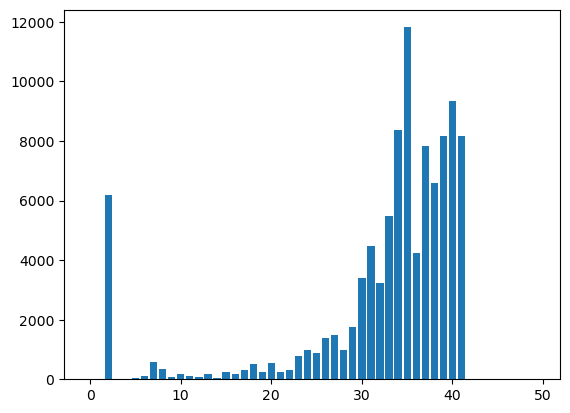

In [10]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h) # x,y
plt.show()